# Data Analysis and Model Building of Food Delivery APP

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26


In [5]:
test.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [7]:
train.describe(include=['object'])

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
count,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593
unique,45593,1320,23,29,44,177,193,7,5,4,4,5,3,4,45
top,0x4607,PUNERES01DEL01,35,4.8,15-03-2022,NaN,21:30:00,conditions Fog,Low,Snack,motorcycle,1,No,Metropolitian,(min) 26
freq,1,67,2262,7148,1192,1731,496,7654,15477,11533,26435,28159,44469,34093,2123


In [8]:
test.describe(include=['object']).T

,count,unique,top,freq
ID,11399,11399,0x2318,1
Delivery_person_ID,11399,1297,COIMBRES01DEL01,24
Delivery_person_Age,11399,23,30,579
Delivery_person_Ratings,11399,29,4.9,1863
Order_Date,11399,44,01-04-2022,307
Time_Orderd,11399,177,NaN,444
Time_Order_picked,11399,193,19:25:00,133
Weatherconditions,11399,7,conditions Sunny,1975
Road_traffic_density,11399,5,Low,3881
Type_of_order,11399,4,Drinks,2920


In [9]:
train.nunique()

ID                             45593
Delivery_person_ID              1320
Delivery_person_Age               23
Delivery_person_Ratings           29
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      177
Time_Order_picked                193
Weatherconditions                  7
Road_traffic_density               5
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                5
Festival                           3
City                               4
Time_taken(min)                   45
dtype: int64

In [10]:
train.drop('ID',axis=1,inplace=True)


In [11]:
train['Delivery_person_ID'].head(10)

0      INDORES13DEL02 
1      BANGRES18DEL02 
2      BANGRES19DEL01 
3     COIMBRES13DEL02 
4      CHENRES12DEL01 
5       HYDRES09DEL03 
6    RANCHIRES15DEL01 
7       MYSRES15DEL02 
8       HYDRES05DEL02 
9       DEHRES17DEL01 
Name: Delivery_person_ID, dtype: object

In [12]:
obj = train.select_dtypes(include=['object'])
for i in obj.columns:
    print(train[i].value_counts())
    

PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: Delivery_person_ID, Length: 1320, dtype: int64
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: Delivery_person_Age, dtype: int64
4.8     7148
4.7     7142
4.9     7041
4.6     6940
5       3996
4.5     3303
NaN     1908
4.1     1430
4.2     1418
4.3     1409
4.4     1361
4       1077
3.5      249
3.8      228
3.7      225
3.6      207
3.9      197
6         53
1         38
3.4       32
3.1       29
3.2       29
3.3       25
2.6       22
2.7       22
2.5       20
2.8       19
2.9       19
3 

In [13]:
train['Delivery_person_ID'].nunique()


1320

In [14]:
train['no_res']=train['Delivery_person_ID'].str.split('RES',expand=True)[0]



In [15]:
train.head(3)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),no_res
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,INDO
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,BANG
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,BANG


In [16]:
train['no_res'].nunique()


22

In [17]:
train.drop('Delivery_person_ID',axis=1,inplace=True)


In [18]:
train['Delivery_person_Age'] = train['Delivery_person_Age'].astype('float')


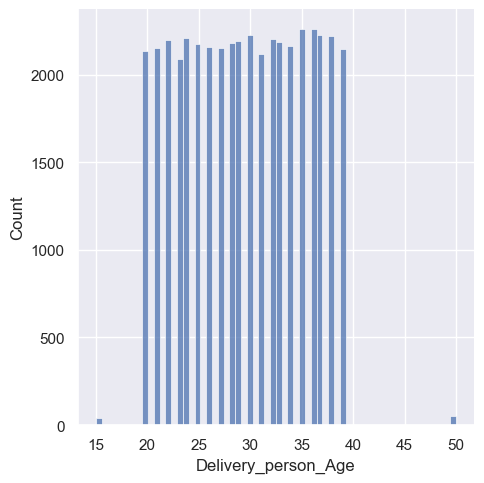

In [19]:
sns.displot(train['Delivery_person_Age'])
plt.show()

In [20]:
train['Delivery_person_Ratings']=train['Delivery_person_Ratings'].astype('float64')


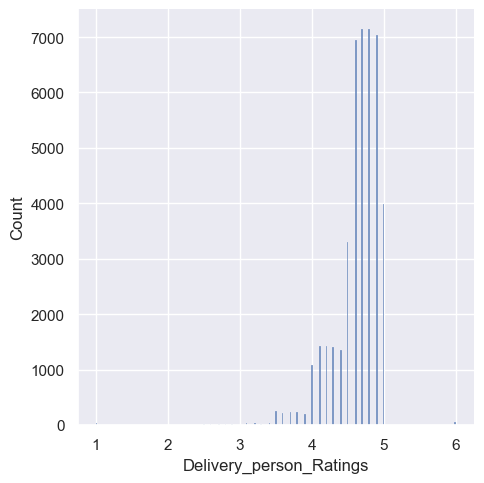

In [21]:
sns.displot(train['Delivery_person_Ratings'])
plt.show()


#### Date Augmentation

In [22]:
train['Order_Date']=pd.to_datetime(train['Order_Date'])
train['year']= train['Order_Date'].dt.year
train['month']= train['Order_Date'].dt.month
train['day']= train['Order_Date'].dt.day
train.drop('Order_Date',inplace=True,axis=1)

In [23]:
train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),no_res,year,month,day
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,conditions Sunny,High,...,Snack,motorcycle,0,No,Urban,(min) 24,INDO,2022,3,19
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,conditions Stormy,Jam,...,Snack,scooter,1,No,Metropolitian,(min) 33,BANG,2022,3,25
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,conditions Sandstorms,Low,...,Drinks,motorcycle,1,No,Urban,(min) 26,BANG,2022,3,19
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,conditions Sunny,Medium,...,Buffet,motorcycle,1,No,Metropolitian,(min) 21,COIMB,2022,5,4
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,conditions Cloudy,High,...,Snack,scooter,1,No,Metropolitian,(min) 30,CHEN,2022,3,26


In [24]:
train['Time_Orderd'].value_counts()


NaN         1731
21:55:00     461
17:55:00     456
20:00:00     449
22:20:00     448
            ... 
12:25:00      57
14:15:00      56
16:00:00      53
13:20:00      52
16:30:00      51
Name: Time_Orderd, Length: 177, dtype: int64

In [25]:
train.replace({"NaN": np.nan}, regex=True, inplace = True)

In [26]:
train['Time_Orderd_Hour']=train['Time_Orderd'].str.split(':',expand=True)[0] 
train.dropna(subset=['Time_Orderd_Hour'],inplace=True)
train['Time_Orderd_Hour']=train['Time_Orderd_Hour'].astype('int64')

In [27]:
train.head(3)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),no_res,year,month,day,Time_Orderd_Hour
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,conditions Sunny,High,...,motorcycle,0,No,Urban,(min) 24,INDO,2022,3,19,11
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,conditions Stormy,Jam,...,scooter,1,No,Metropolitian,(min) 33,BANG,2022,3,25,19
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,conditions Sandstorms,Low,...,motorcycle,1,No,Urban,(min) 26,BANG,2022,3,19,8


In [28]:
train['Time_Orderd_Min']=train['Time_Orderd'].str.split(':',expand=True)[1]
train['Time_Orderd_Min']=train['Time_Orderd_Min'].astype('int64')

In [29]:
train.head(3)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,...,multiple_deliveries,Festival,City,Time_taken(min),no_res,year,month,day,Time_Orderd_Hour,Time_Orderd_Min
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,conditions Sunny,High,...,0,No,Urban,(min) 24,INDO,2022,3,19,11,30
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,conditions Stormy,Jam,...,1,No,Metropolitian,(min) 33,BANG,2022,3,25,19,45
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,conditions Sandstorms,Low,...,1,No,Urban,(min) 26,BANG,2022,3,19,8,30


In [30]:
train['Time_Order_picked_Hour']=train['Time_Order_picked'].str.split(":",expand=True)[0].astype('int')
train['Time_Order_picked_Min']=train['Time_Order_picked'].str.split(":",expand=True)[1].astype('int')

In [31]:
train.drop(['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)


In [32]:
train.head(3)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,City,Time_taken(min),no_res,year,month,day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,2,Snack,...,Urban,(min) 24,INDO,2022,3,19,11,30,11,45
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,2,Snack,...,Metropolitian,(min) 33,BANG,2022,3,25,19,45,19,50
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,0,Drinks,...,Urban,(min) 26,BANG,2022,3,19,8,30,8,45


In [33]:
train['Restaurant_latitude']=train['Restaurant_latitude'].abs()


In [34]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

train['distance'] = train.apply(lambda x:haversine_distance(x['Restaurant_latitude'], x['Restaurant_longitude'], x['Delivery_location_latitude'], x['Delivery_location_longitude']), axis=1)

In [35]:
train.sort_values(by='distance', ascending=False).head(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Time_taken(min),no_res,year,month,day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance
25926,32.0,3.8,25.443994,81.860187,25.583994,82.000187,conditions Sandstorms,Jam,2,Snack,...,(min) 33,ALH,2022,2,14,20,25,20,30,20.969489
912,22.0,4.7,25.443994,81.860187,25.583994,82.000187,conditions Cloudy,Low,2,Drinks,...,(min) 26,ALH,2022,2,16,22,55,23,10,20.969489
15710,22.0,5.0,25.443994,81.860187,25.583994,82.000187,conditions Sandstorms,Low,1,Meal,...,(min) 12,ALH,2022,12,2,22,10,22,15,20.969489
25476,25.0,4.7,25.449659,81.839744,25.589659,81.979744,conditions Windy,Jam,1,Snack,...,(min) 18,ALH,2022,2,16,21,10,21,15,20.969045
16640,37.0,4.8,25.449659,81.839744,25.589659,81.979744,conditions Sunny,Jam,1,Buffet,...,(min) 20,ALH,2022,12,2,22,0,22,15,20.969045


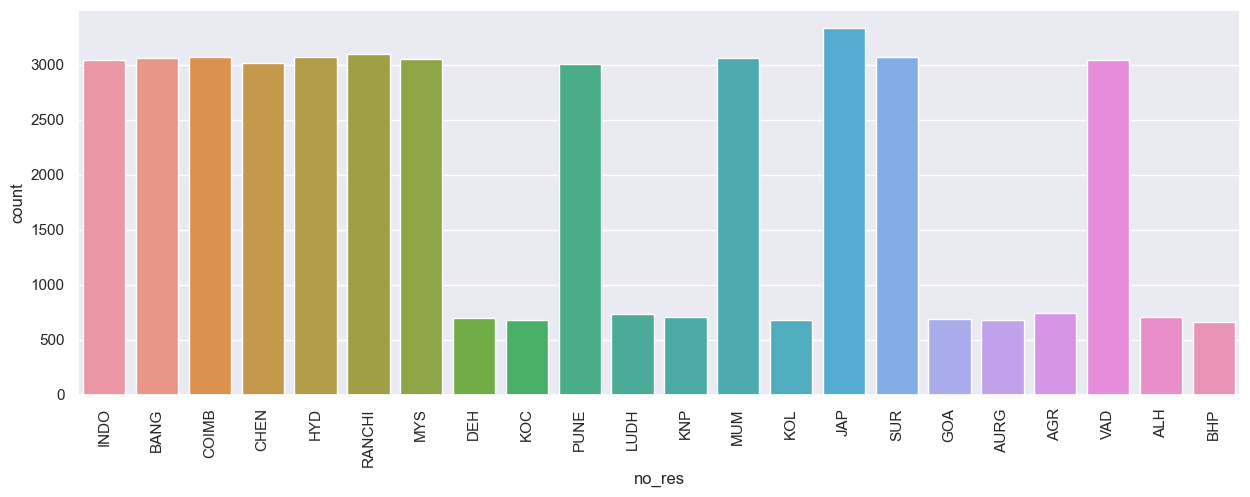

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='no_res')
plt.xticks(rotation='vertical')
plt.show()

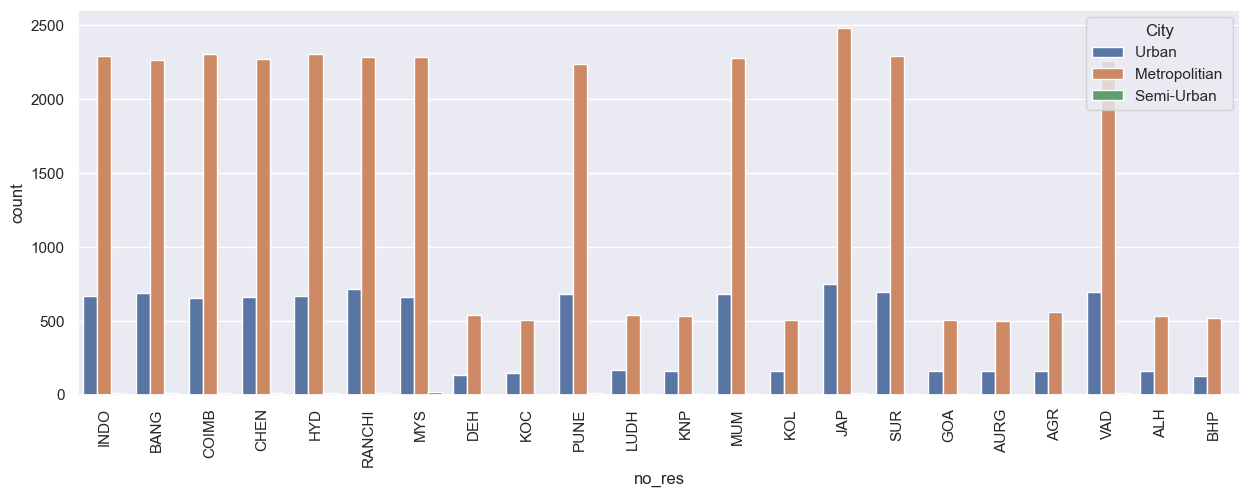

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x=train.no_res,hue=train.City)
plt.xticks(rotation='vertical')
plt.show()# as expected Metropolitian cities ordered most of the orders

<Axes: xlabel='Type_of_order', ylabel='count'>

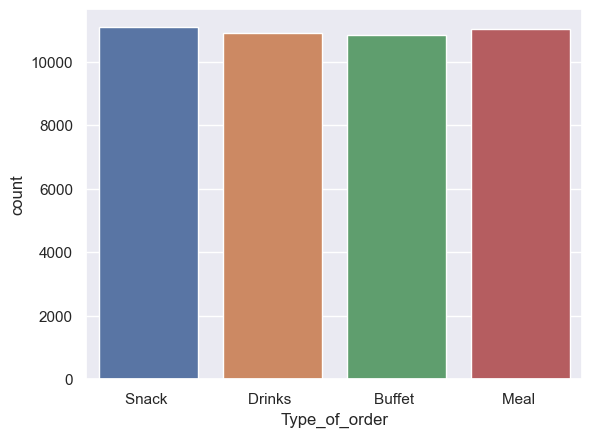

In [38]:
sns.countplot(x=train.Type_of_order)

<Axes: xlabel='City', ylabel='count'>

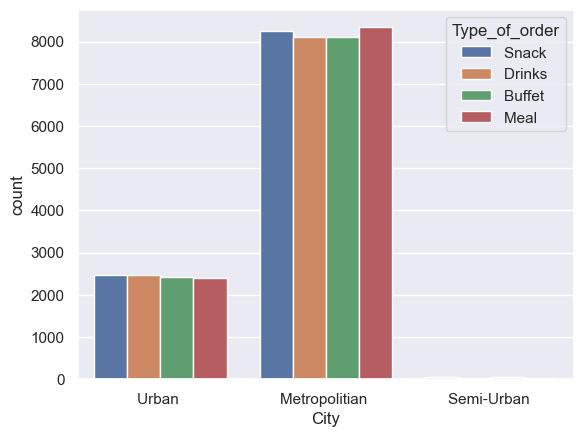

In [39]:
sns.countplot(x=train.City,hue=train.Type_of_order)


In [40]:
train.head(3)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Time_taken(min),no_res,year,month,day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,2,Snack,...,(min) 24,INDO,2022,3,19,11,30,11,45,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,2,Snack,...,(min) 33,BANG,2022,3,25,19,45,19,50,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,0,Drinks,...,(min) 26,BANG,2022,3,19,8,30,8,45,1.552758


In [41]:
train.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1,inplace=True)


In [42]:
train.head(3)

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),no_res,year,month,day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance
0,37.0,4.9,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,INDO,2022,3,19,11,30,11,45,3.025149
1,34.0,4.5,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,BANG,2022,3,25,19,45,19,50,20.183530
2,23.0,4.4,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,BANG,2022,3,19,8,30,8,45,1.552758


In [43]:
train['Type_of_vehicle'].value_counts()

motorcycle           25633
scooter              14695
electric_scooter      3534
Name: Type_of_vehicle, dtype: int64

In [44]:
train['Type_of_order'].value_counts()

Snack      11091
Meal       11018
Drinks     10897
Buffet     10856
Name: Type_of_order, dtype: int64

In [45]:
veh_train = pd.get_dummies(train, columns=['Type_of_vehicle'])

In [46]:
veh_train.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,multiple_deliveries,Festival,City,Time_taken(min),...,month,day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,37.0,4.9,conditions Sunny,High,2,Snack,0,No,Urban,(min) 24,...,3,19,11,30,11,45,3.025149,0,1,0
1,34.0,4.5,conditions Stormy,Jam,2,Snack,1,No,Metropolitian,(min) 33,...,3,25,19,45,19,50,20.183530,0,0,1


In [47]:
order_type_train = pd.get_dummies(veh_train, columns=['Type_of_order'])

In [48]:
order_type_train.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,Time_taken(min),no_res,...,Time_Order_picked_Hour,Time_Order_picked_Min,distance,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,37.0,4.9,conditions Sunny,High,2,0,No,Urban,(min) 24,INDO,...,11,45,3.025149,0,1,0,0,0,0,1
1,34.0,4.5,conditions Stormy,Jam,2,1,No,Metropolitian,(min) 33,BANG,...,19,50,20.183530,0,0,1,0,0,0,1


In [49]:
order_type_train['Weatherconditions'].value_counts()

conditions Fog           7476
conditions Stormy        7402
conditions Cloudy        7339
conditions Sandstorms    7285
conditions Windy         7251
conditions Sunny         7109
Name: Weatherconditions, dtype: int64

In [50]:
order_type_train['Road_traffic_density'].value_counts()

Low        15062
Jam        13800
Medium     10678
High        4322
Name: Road_traffic_density, dtype: int64

In [51]:
order_type_train['Weatherconditions']=order_type_train['Weatherconditions'].map({'conditions Sunny':1 ,'conditions Windy':2,'conditions Sandstorms':3,'conditions Cloudy':4,'conditions Stormy':5,'conditions Fog':6})

In [54]:
order_type_train['Road_traffic_density']=order_type_train['Road_traffic_density'].map({'High':1 ,'Medium':2,'Jam':3,'Low':4})

In [55]:
order_type_train.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,Time_taken(min),no_res,...,Time_Order_picked_Hour,Time_Order_picked_Min,distance,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,37.0,4.9,1,NaN,2,0,No,Urban,(min) 24,INDO,...,11,45,3.025149,0,1,0,0,0,0,1
1,34.0,4.5,5,NaN,2,1,No,Metropolitian,(min) 33,BANG,...,19,50,20.183530,0,0,1,0,0,0,1


In [58]:
order_type_train.drop('Road_traffic_density',axis=1, inplace=True)


In [59]:
order_type_train.drop('City',axis=1, inplace=True)

In [60]:
order_type_train.drop('no_res',axis=1, inplace=True)

In [61]:
order_type_train.head(3)

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min),year,month,day,...,Time_Order_picked_Hour,Time_Order_picked_Min,distance,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,37.0,4.9,1,2,0,No,(min) 24,2022,3,19,...,11,45,3.025149,0,1,0,0,0,0,1
1,34.0,4.5,5,2,1,No,(min) 33,2022,3,25,...,19,50,20.183530,0,0,1,0,0,0,1
2,23.0,4.4,3,0,1,No,(min) 26,2022,3,19,...,8,45,1.552758,0,1,0,0,1,0,0


In [84]:
order_type_train['Time_taken(min)']=order_type_train['Time_taken(min)'].str.split(")",expand=True)[1].astype('int')


In [92]:
order_type_train.drop('Festival',axis=1, inplace=True)

In [93]:
order_type_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Vehicle_condition,multiple_deliveries,Time_taken(min),year,month,day,Time_Orderd_Hour,...,Time_Order_picked_Hour,Time_Order_picked_Min,distance,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,37.0,4.9,1,2,0,24,2022,3,19,11,...,11,45,3.025149,0,1,0,0,0,0,1
1,34.0,4.5,5,2,1,33,2022,3,25,19,...,19,50,20.183530,0,0,1,0,0,0,1
2,23.0,4.4,3,0,1,26,2022,3,19,8,...,8,45,1.552758,0,1,0,0,1,0,0
3,38.0,4.7,1,0,1,21,2022,5,4,18,...,18,10,7.790401,0,1,0,1,0,0,0
4,32.0,4.6,4,1,1,30,2022,3,26,13,...,13,45,6.210138,0,0,1,0,0,0,1


In [100]:
order_type_train.replace({"NaN": np.nan}, regex=True, inplace = True)

In [102]:
order_type_train.isnull().sum()/len(order_type_train)*100

Delivery_person_Age                  0.487894
Delivery_person_Ratings              0.611007
Weatherconditions                    0.000000
Vehicle_condition                    0.000000
multiple_deliveries                  2.149925
Time_taken(min)                      0.000000
year                                 0.000000
month                                0.000000
day                                  0.000000
Time_Orderd_Hour                     0.000000
Time_Orderd_Min                      0.000000
Time_Order_picked_Hour               0.000000
Time_Order_picked_Min                0.000000
distance                             0.000000
Type_of_vehicle_electric_scooter     0.000000
Type_of_vehicle_motorcycle           0.000000
Type_of_vehicle_scooter              0.000000
Type_of_order_Buffet                 0.000000
Type_of_order_Drinks                 0.000000
Type_of_order_Meal                   0.000000
Type_of_order_Snack                  0.000000
dtype: float64

In [103]:
order_type_train.dropna(inplace=True)


In [104]:
# Split in x and y

In [105]:
X = order_type_train.drop('Time_taken(min)',axis=1)
y = order_type_train[['Time_taken(min)']]

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34128, 20)
X_test shape: (8533, 20)
y_train shape: (34128, 1)
y_test shape: (8533, 1)


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 48.778009512022265
R^2 Score: 0.43109901165434383


In [111]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 15.531562463377476
R^2 Score: 0.8188544115603987


In [113]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 21.562103973109263
R^2 Score: 0.7485198271960996


In [115]:
# Accuracy -a)  From GradientBoostingRegressor =74.85%
#            b)  From RandomForestRegressor     =81.88%

*****Thanks****